# Mohak Gangwani

## **Task 2 - Prediction using Unsupervised ML**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans

In [2]:
# Loading the iris dataset
iris_df = pd.read_csv("Iris.csv")
iris_df.drop("Id",axis=1,inplace=True)
iris_df.head() # See the first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratory Data Analysis

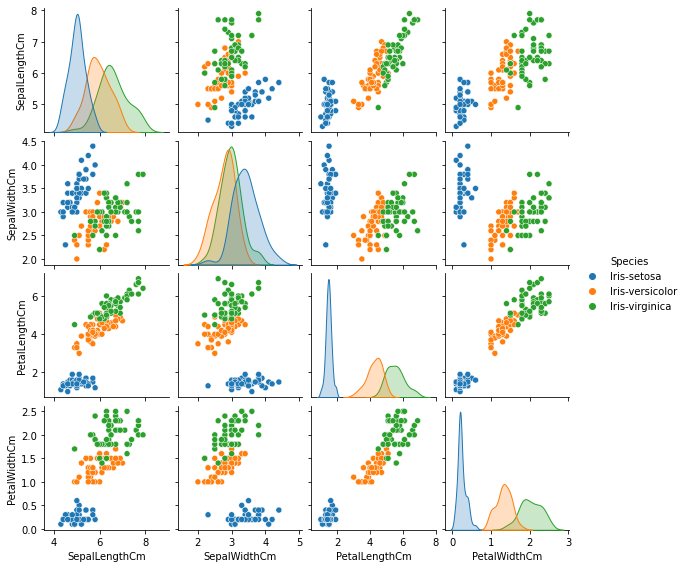

In [3]:
sns.pairplot(iris_df, hue='Species', diag_kind='kde',height=2)
plt.show()

## Elbow Method for optimal value of k in KMeans

### Elbow method using inertia

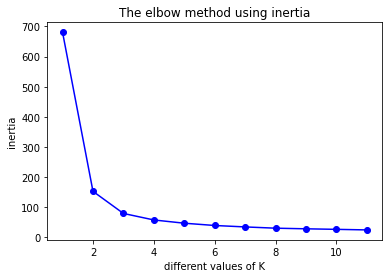

In [4]:
x = iris_df.iloc[:,0:4].values
distortions=[] #To store calculated average of the squared distances from the cluster centers of the respective Clusters
inertia=[] # It is the sum of squared distances of samples to their closest cluster center
for i in range(1,12):
    kmeans = KMeans(n_clusters = i).fit(x)
    distortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_, 
                      'euclidean'),axis=1)) / x.shape[0])
    
    inertia= inertia + [kmeans.inertia_] ##squared error
plt.figure()
plt.plot(range(1, 12), inertia,'bo-')
plt.title('The elbow method using inertia')
plt.xlabel('different values of K')
plt.ylabel('inertia') # Within cluster sum of squares
plt.show()

### Elbow method using distortion

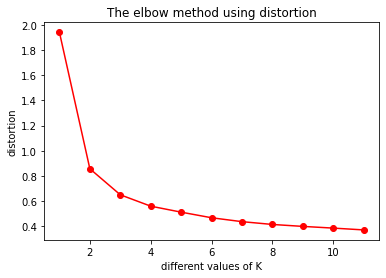

In [5]:
plt.figure()
plt.plot(range(1, 12), distortions,'ro-')
plt.title('The elbow method using distortion')
plt.xlabel('different values of K')
plt.ylabel('distortion') # Within cluster average of squares
plt.show()

## Plot Clustering for optimal value of K (3 in this case)

In [6]:
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap, BoundaryNorm
def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()

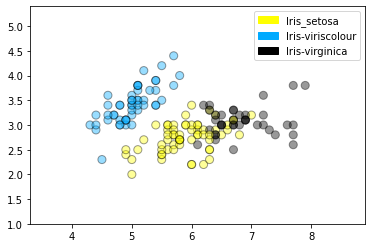

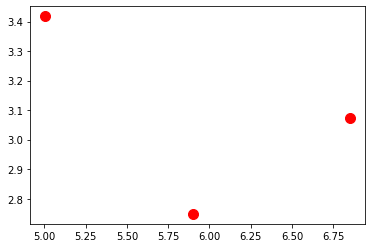

In [7]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)
plot_labelled_scatter(x, kmeans.labels_, ['Iris_setosa','Iris-viriscolour','Iris-virginica'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids',marker='o')
plt.show()

## Plot clustering for different values of K

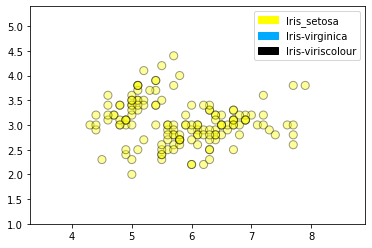

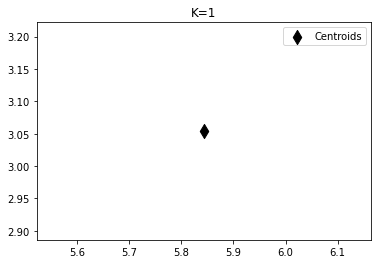

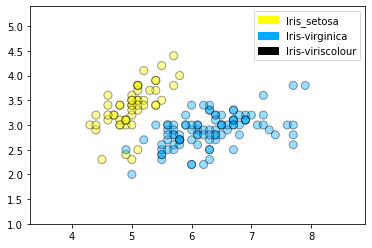

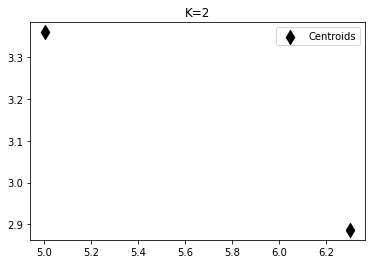

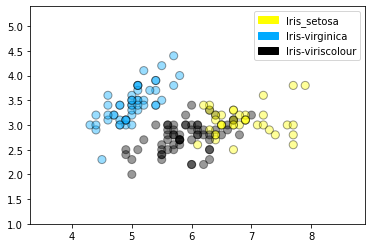

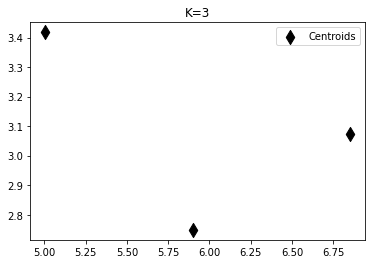

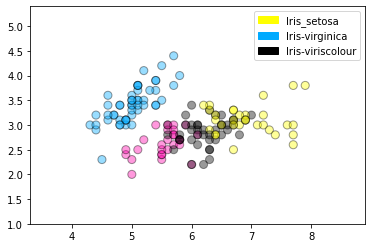

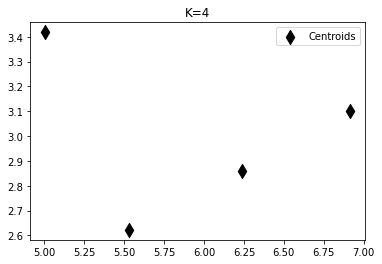

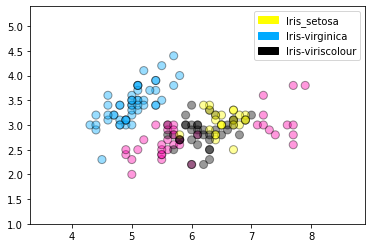

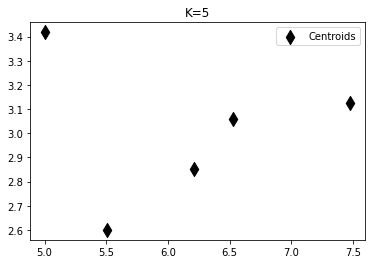

In [8]:
for i in range(1,6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
    y_kmeans = kmeans.fit_predict(x)
    plot_labelled_scatter(x, kmeans.labels_, ['Iris_setosa','Iris-virginica','Iris-viriscolour'])
    # Plotting the centroids of the clusters
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids',marker='d')
    plt.gca().set_title("K={}".format(i))
    plt.legend()
    plt.show()